In [1]:
# docker run -it --rm -p 10000:8888 -v "${PWD}":/home/jovyan/work jupyter/datascience-notebook:r-3.6.2
R.version

               _                           
platform       x86_64-conda_cos6-linux-gnu 
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.2                         
year           2019                        
month          12                          
day            12                          
svn rev        77560                       
language       R                           
version.string R version 3.6.2 (2019-12-12)
nickname       Dark and Stormy Night       

In [1]:
packageVersion("rlang") # ‘1.0.6’
devtools::install_github("r-lib/rlang")
packageVersion("rlang") # ‘1.1.0.9000’

[1] ‘1.1.1.9000’

---
title: "JavaScriptEvolution"
author: "Walter Lucas et al."
date: "16/6/2023"
output: html_document
---

In [4]:
# version
install.packages("glue", dependencies = TRUE)
install.packages("sqldf", dependencies = TRUE)
install.packages("stringr", dependencies = TRUE)
install.packages("reshape2", dependencies = TRUE)
install.packages("ggplot2", dependencies = TRUE)
install.packages("lubridate", dependencies = TRUE)
install.packages("lattice", dependencies = TRUE)
install.packages("corrplot", dependencies = TRUE)
install.packages("parsedate", dependencies = TRUE)
install.packages("xtable", dependencies = TRUE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘RJDBC’, ‘rJava’, ‘RH2’, ‘RMySQL’, ‘RPostgreSQL’


Warning message in install.packages("sqldf", dependencies = TRUE):
“installation of package ‘rJava’ had non-zero exit status”
Warning message in install.packages("sqldf", dependencies = TRUE):
“installation of package ‘RMySQL’ had non-zero exit status”
Warning message in install.packages("sqldf", dependencies = TRUE):
“installation of package ‘RPostgreSQL’ had non-zero exit status”
Warning message in install.packages("sqldf", dependencies = TRUE):
“installation of package ‘RJDBC’ had non-zero exit status”
Warning message in install.packages("sqldf", dependencies = TRUE):
“installation of package ‘RH2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.L

In [1]:
knitr::opts_chunk$set(echo = TRUE)
library(sqldf)
library(stringr)
library(reshape2)
library(ggplot2)
library(lubridate)
library(lattice)
library(dplyr)
library(corrplot)
library(parsedate)
library(xtable)
setwd(".")

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded



In [2]:
## Load the dataset

# async-declarationsawait-declarations	const-declarations	class-declarations	arrow-function-declarations	let-declarations
# export-declarations	yield-declarations	import-statements	promise-declarations	promise-all-and-then	default-parameters	
# rest-statements	spread-arguments	array-destructuring	object-destructuring

ds <- read.csv("results.csv", head=TRUE, sep=",")

ds$date <- as.Date(parse_date(ds$date))

projects <- sqldf("select project, 
                          min(date) as first_revision, 
                          max(date) as last_revision, 
                          count(revision) as commits
                    from ds
                    group by project", method = "name__class")
projects

project,first_revision,last_revision,commits
<chr>,<dbl>,<dbl>,<int>
autoprefixer,15770,19633,277
backbone,15341,19448,280
bootstrap-datepicker,15380,19490,275
bootstrap-table,15937,19665,370
bootswatch,15346,19542,294
browser-sync,15748,19494,171
bull,15743,19631,271
chart.js,15781,19575,360
chokidar,15407,19503,193


feature,Mean,Max,Min,Median,Std
<fct>,<dbl>,<int>,<int>,<int>,<dbl>
async_declarations,342.61165,3316,0,137,621.6610
const_declarations,1385.33010,10044,0,624,1981.9938
arrow_function_declarations,3482.63107,29628,0,1694,4597.5320
let_declarations,387.36893,4329,0,126,731.8157
object_destructuring,91.70874,1099,0,14,189.6575


feature,sum(total)
<fct>,<int>
array_destructuring,1015
arrow_function_declarations,358711
async_declarations,35289
await_declarations,20345
class_declarations,2243
const_declarations,142689
default_parameters,2515
export_declarations,7797
import_statements,23262


feature,percentage
<chr>,<dbl>
array_destructuring,52
arrow_function_declarations,98
async_declarations,89
await_declarations,65
class_declarations,59
const_declarations,92
default_parameters,68
export_declarations,50
import_statements,61


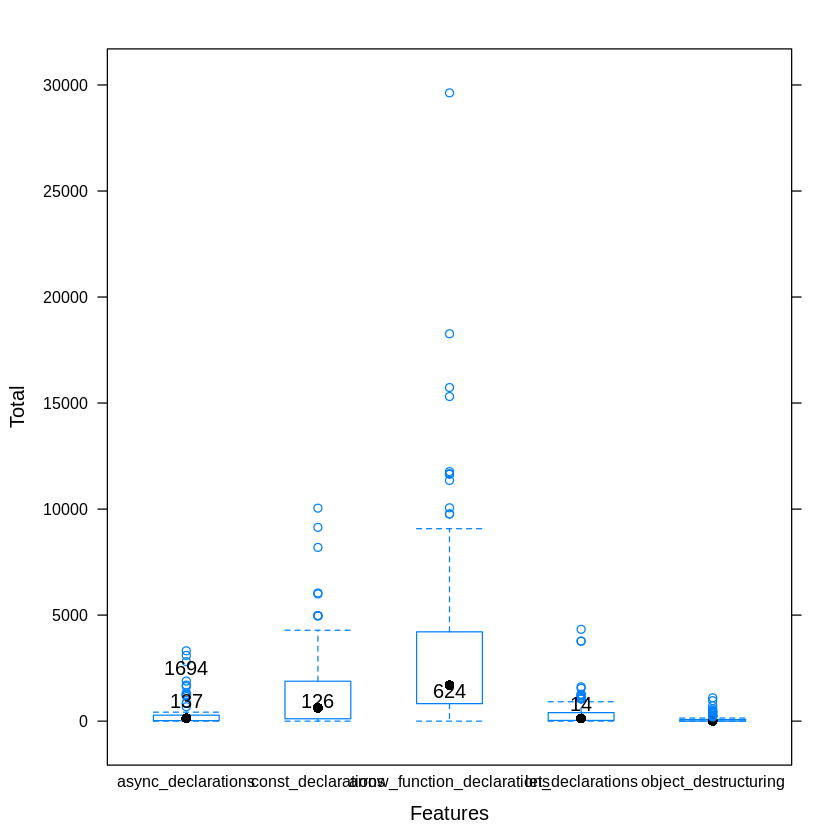

In [8]:
### Research Question 1

rq1 <- sqldf("select ds.project, date,async_declarations,await_declarations,const_declarations,class_declarations,
              arrow_function_declarations,let_declarations,export_declarations,yield_declarations,import_statements,
              promise_declarations,promise_all_and_then,default_parameters,rest_statements,spread_arguments,array_destructuring,
              object_destructuring,statements,files
              from ds, projects p
              where ds.project = p.project
              and ds.date = p.last_revision", method = "name__class")

rq1 <- melt(rq1, id.vars=c("project", "date", "statements", "files"), value.name = "total", variable.name="feature")

# colnames(rq1)

rq5 <- sqldf("select project, feature, total
                      from rq1 
                      where feature in ('async_declarations','arrow_function_declarations', 'const_declarations',
'let_declarations','object_destructuring')
                      order by 2")

# pdf("distribution.pdf",         # File name
#     width = 8, height = 7, # Width and height in inches
#     bg = "white")

# bwplot(total~feature,data=rq5,xlab="Features",ylab="Total")

# dev.off()

bwplot(total~feature,data=rq5,xlab="Features",ylab="Total", md = tapply(rq5$total, rq5$feature, median),
       panel = function(x, y, md, ...) {
         panel.bwplot(x, y, ...)
         panel.text(x = 1:4, y = md, labels = round(md, 2), pos = 3)
       })

my_tibble <- rq5%>%
group_by(feature)%>% 
summarise(Mean=mean(total), Max=max(total), Min=min(total), Median=median(total), Std=sd(total))

my_df <- as.data.frame(my_tibble)
my_df


# xtable(my_df)


my_total <- sqldf("select feature, sum(total)
       from rq1 
       group by feature 
       order by 1")

my_total


# xtable(my_total)


rq1_summary <- sqldf("select feature, (100*count(distinct project))/100.0 percentage
                      from rq1 
                      where total > 0 
                      group by feature", method = "name__class")

rq1_summary

# xtable(rq1_summary)


[1] 355

[1] "project"     "total_arrow" "total_async" "total_const" "total_let"

[1] "Arrow Function Declarations" "Async Declarations"         
[3] "Const Declarations"          "Let Declarations"

,Arrow Function Declarations,Async Declarations,Const Declarations,Let Declarations
Arrow Function Declarations,1.0000000,0.7668754,0.7982574,0.5904706
Async Declarations,0.7668754,1.0000000,0.8753992,0.7475299
Const Declarations,0.7982574,0.8753992,1.0000000,0.7072034
Let Declarations,0.5904706,0.7475299,0.7072034,1.0000000


feature,statments,files
<fct>,<dbl>,<dbl>
async_declarations,0.5118759,0.4072746
const_declarations,0.3832167,0.4285479
arrow_function_declarations,0.9313660,0.7718321
let_declarations,0.4853341,0.4995481


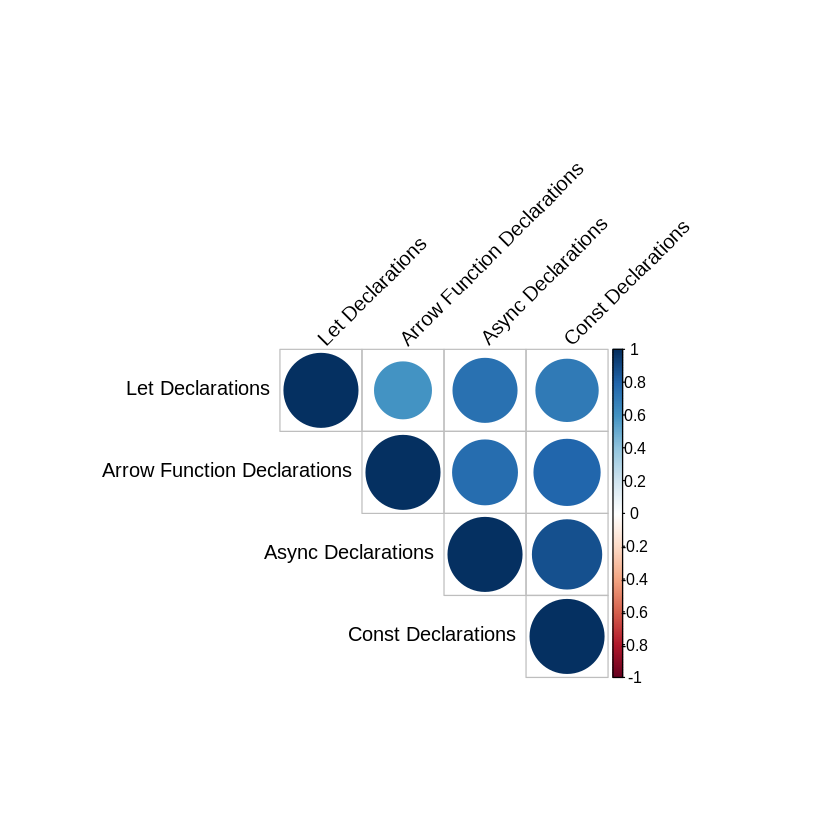

In [4]:
rq6 <- sqldf("select project, feature, statements, files, total
                      from rq1 
                      where feature in ('async_declarations','arrow_function_declarations', 'const_declarations',
'let_declarations')
                      order by 2")

# rq6

arrow_function_declarations <- sqldf("select project, total as total_arrow from rq6 where feature = 
'arrow_function_declarations'")
async_declarations <- sqldf("select project, total as total_async from rq6 where feature = 'async_declarations'")
const_declarations <- sqldf("select project, total as total_const from rq6 where feature = 'const_declarations'")
let_declarations <- sqldf("select project, total as total_let from rq6 where feature = 'let_declarations'")

rq8 <- merge(arrow_function_declarations,async_declarations)
rq8 <- merge(rq8,const_declarations)
rq8 <- merge(rq8,let_declarations)

nrow(rq8)
colnames(rq8)

rq8 <- sqldf("select total_arrow as [Arrow Function Declarations], total_async as [Async Declarations], 
total_const as [Const Declarations], total_let as [Let Declarations] from rq8")

res <- cor(rq8)
colnames(res)
res

corrplot(res, type = "upper", order = "hclust", 
          tl.col = "black", tl.srt = 45)


rq6%>%
group_by(feature)%>% 
summarise(statments=cor(statements,total,method="spearman"), files=cor(files,total,method="spearman"))


In [11]:
cd <- as.Date("2012-01-01")
maxDate <- as.Date("2023-06-30")

accm = ds[FALSE,]
nrow(accm)
while(cd < maxDate) {
  lastCommit <- fn$sqldf("select project, max(date) as date
                       from ds 
                       where date < '$cd'
                       group by project");
  
  
  
  monthYear = format(cd, "%Y-%m");
  
  snapshot <- fn$sqldf("select ds.*, '$monthYear' as monthYear
                        from ds, lastCommit lc
                        where ds.project = lc.project 
                          and ds.date = lc.date");
  
  
  accm <- rbind(accm, snapshot);
  
  # cd <- cd + 7;
  cd <- ymd(cd %m+% months(1))
}

rq2 <- sqldf("select project, monthYear, async_declarations,await_declarations,const_declarations,
class_declarations,arrow_function_declarations,let_declarations,export_declarations,yield_declarations,
import_statements,promise_declarations,promise_all_and_then,default_parameters,rest_statements,
spread_arguments,array_destructuring,object_destructuring
              from accm")

sqldf("select count(distinct project) from accm")

rq2 <- melt(rq2, id.vars=c("project", "monthYear"), value.name = "total", variable.name="feature")


sqldf("select feature, min(monthYear)
       from rq2
       where total > 0
       group by feature")

[1] 0

count(distinct project)
<int>
100


feature,min(monthYear)
<fct>,<chr>
array_destructuring,2012-02
arrow_function_declarations,2012-02
async_declarations,2012-02
await_declarations,2015-03
class_declarations,2014-01
const_declarations,2012-02
default_parameters,2015-02
export_declarations,2013-02
import_statements,2013-02


In [13]:
ts <- sqldf("select feature, monthYear, sum(total) total
       from rq2 
       group by feature, monthYear 
       order by 1,2")

ts$monthYear = as.Date(paste(ts$monthYear,"-01",sep=""))

# Customizing the output
pdf("arrow_function_declarations.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'arrow_function_declarations',], type = "l")
dev.off()

# Customizing the output
pdf("async_declarations.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'async_declarations',], type = "l")
dev.off()

# # Customizing the output
pdf("let_declarations.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'let_declarations',], type = "l")
dev.off()


feature,monthYear,total
<fct>,<date>,<int>
array_destructuring,2012-02-01,6
array_destructuring,2012-03-01,6
array_destructuring,2012-04-01,8
array_destructuring,2012-05-01,8
array_destructuring,2012-06-01,8
array_destructuring,2012-07-01,8
array_destructuring,2012-08-01,0
array_destructuring,2012-09-01,0
array_destructuring,2012-10-01,0


In [7]:
pdf("const_declarations.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'const_declarations',], type = "l")
dev.off()

pdf("object_destructuring.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'object_destructuring',], type = "l")
dev.off()

pdf("array_destructuring.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'array_destructuring',], type = "l")
dev.off()

png 
  2

png 
  2

png 
  2